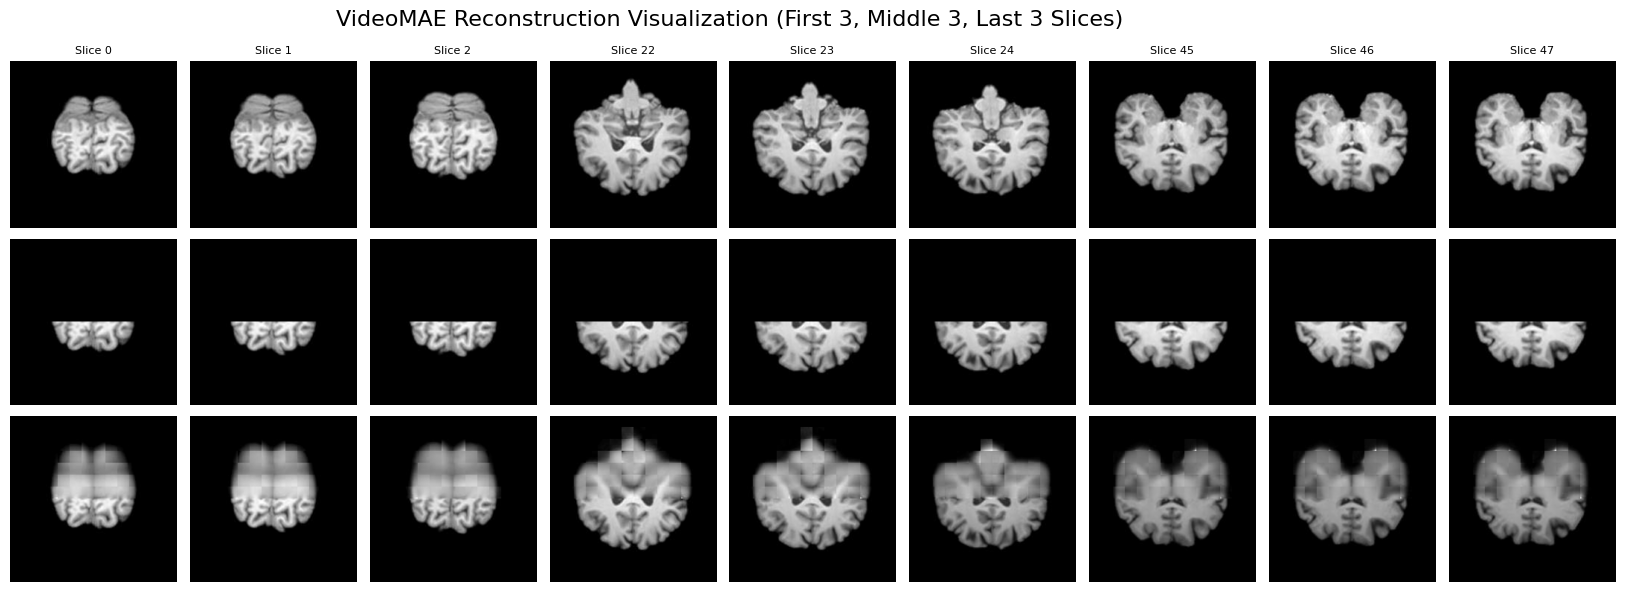

In [8]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set the base directory path
base_dir = "/home/tianze/Code/VideoMAE/visualization/vit_base-ad_sampling-half_mask-cov_loss_entropy-K400-MRI-pretrain"

# Define the three subdirectories
subdirs = ["ori_img", "mask_img", "rec_img"]

# Get image files from ori_img directory (assuming all directories have same files)
ori_dir = os.path.join(base_dir, "ori_img")
img_files = [f for f in os.listdir(ori_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
img_files.sort()

# Select first 3, middle 3, and last 3 slices
total_slices = len(img_files)
first_3 = img_files[:3]
middle_start = (total_slices - 3) // 2
middle_3 = img_files[middle_start:middle_start + 3]
last_3 = img_files[-3:]

# Combine all selected slices
selected_files = first_3 + middle_3 + last_3
selected_indices = list(range(3)) + list(range(middle_start, middle_start + 3)) + list(range(total_slices - 3, total_slices))

# Create figure with 3 rows (ori, mask, recon) and 9 columns
fig, axes = plt.subplots(3, 9, figsize=(18, 6))
fig.suptitle('VideoMAE Reconstruction Visualization (First 3, Middle 3, Last 3 Slices)', fontsize=16)

# Row labels
row_labels = ["Original", "Masked", "Reconstructed"]

# Display images
for row, subdir in enumerate(subdirs):
    for col, (img_file, slice_idx) in enumerate(zip(selected_files, selected_indices)):
        img_path = os.path.join(base_dir, subdir, img_file)
        
        if os.path.exists(img_path):
            img = Image.open(img_path)
            axes[row, col].imshow(img, cmap='gray')
            
            # Add title only for first row
            if row == 0:
                axes[row, col].set_title(f'Slice {slice_idx}', fontsize=8)
        else:
            # If image doesn't exist, show empty plot
            axes[row, col].imshow(np.zeros((224, 224)), cmap='gray')
        
        axes[row, col].axis('off')
        
        # Add vertical separator after 3rd and 6th columns
        if col == 2 or col == 5:
            axes[row, col].spines['right'].set_visible(True)
            axes[row, col].spines['right'].set_linewidth(2)
            axes[row, col].spines['right'].set_color('red')
    
    # Add row labels on the left
    axes[row, 0].set_ylabel(row_labels[row], rotation=90, fontsize=12, labelpad=20)

plt.tight_layout()
plt.subplots_adjust(left=0.1)
plt.show()

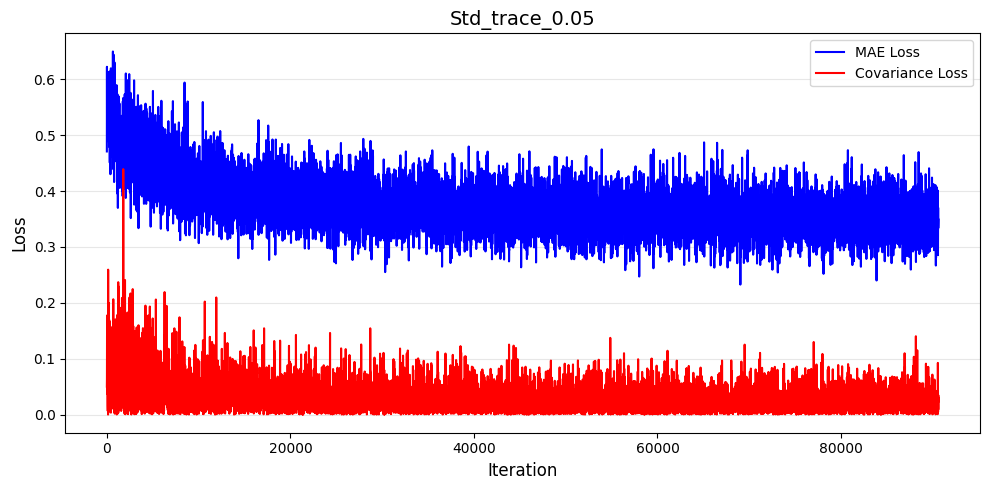

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Read loss log file
log_file = "/home/tianze/Code/VideoMAE/checkpoints/final_experiments/K400-MRI-cov_loss_std_trace-pretrain/log.txt"

iterations = []
mae_losses = []
cov_losses = []

# Parse the log file (JSON format)
with open(log_file, 'r') as f:
    for line in f:
        try:
            data = json.loads(line.strip())
            iterations.append(data['iteration'])
            mae_losses.append(data['train_mae_loss'])
            cov_losses.append(data['train_cov_loss'])
        except (json.JSONDecodeError, KeyError):
            continue

# Create loss plot
plt.figure(figsize=(10, 5))
plt.plot(iterations, mae_losses, 'b-', label='MAE Loss')
plt.plot(iterations, cov_losses, 'r-', label='Covariance Loss')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)

plt.title('Std_trace_0.05', fontsize=14)

plt.grid(True, alpha=0.3, which='both', axis='y')
plt.legend()
plt.tight_layout()
plt.show()



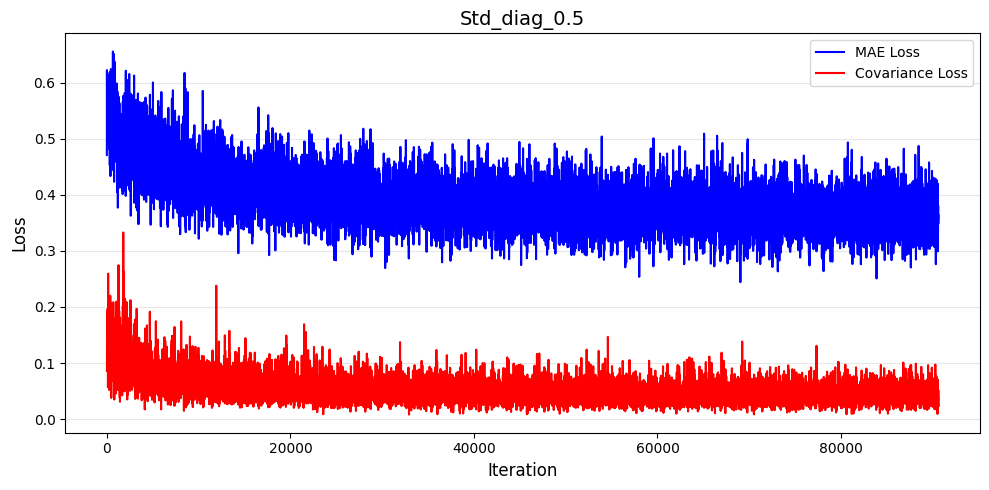

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from collections import defaultdict

# Read loss log file
log_file = "/home/tianze/Code/VideoMAE/checkpoints/final_experiments/K400-MRI-cov_loss_std_diag-pretrain/log.txt"

# Dictionary to store losses grouped by epoch
epoch_data = defaultdict(lambda: {'mae': [], 'cov': []})

# Parse the log file (JSON format) and group by epoch
with open(log_file, 'r') as f:
    for line in f:
        try:
            data = json.loads(line.strip())
            epoch = data['epoch']
            epoch_data[epoch]['mae'].append(data['train_mae_loss'])
            epoch_data[epoch]['cov'].append(data['train_cov_loss'])
        except (json.JSONDecodeError, KeyError):
            continue

# Aggregate losses by epoch (compute mean for each epoch)
epochs = sorted(epoch_data.keys())
mae_losses_per_epoch = [np.mean(epoch_data[e]['mae']) for e in epochs]
cov_losses_per_epoch = [np.mean(epoch_data[e]['cov']) for e in epochs]

# Create loss plot with epochs on x-axis
plt.figure(figsize=(10, 5))
plt.plot(epochs, mae_losses_per_epoch, 'b-', linewidth=2, label='MAE Loss (mean per epoch)', alpha=0.8)
plt.plot(epochs, cov_losses_per_epoch, 'r-', linewidth=2, label='Covariance Loss (mean per epoch)', alpha=0.8)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Std_diag_0.5', fontsize=14)
plt.grid(True, alpha=0.3, which='both', axis='y')
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"Total epochs: {len(epochs)} (from epoch {min(epochs)} to {max(epochs)})")
print(f"Total iterations: {sum(len(epoch_data[e]['mae']) for e in epochs)}")


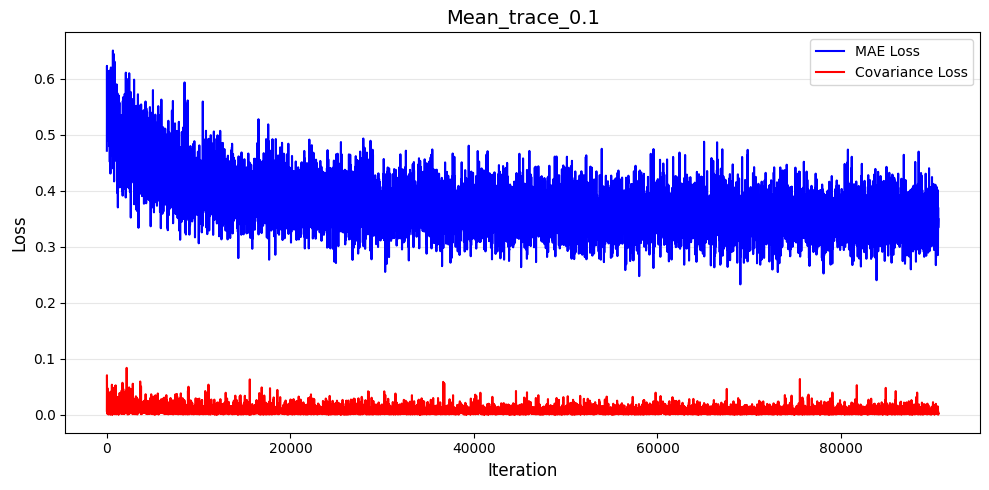

In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Read loss log file
log_file = "/home/tianze/Code/VideoMAE/checkpoints/final_experiments/K400-MRI-cov_loss_mean_trace-pretrain/log.txt"

iterations = []
mae_losses = []
cov_losses = []

# Parse the log file (JSON format)
with open(log_file, 'r') as f:
    for line in f:
        try:
            data = json.loads(line.strip())
            iterations.append(data['iteration'])
            mae_losses.append(data['train_mae_loss'])
            cov_losses.append(data['train_cov_loss'])
        except (json.JSONDecodeError, KeyError):
            continue

# Create loss plot
plt.figure(figsize=(10, 5))
plt.plot(iterations, mae_losses, 'b-', label='MAE Loss')
plt.plot(iterations, cov_losses, 'r-', label='Covariance Loss')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)

plt.title('Mean_trace_0.1', fontsize=14)

plt.grid(True, alpha=0.3, which='both', axis='y')
plt.legend()
plt.tight_layout()
plt.show()



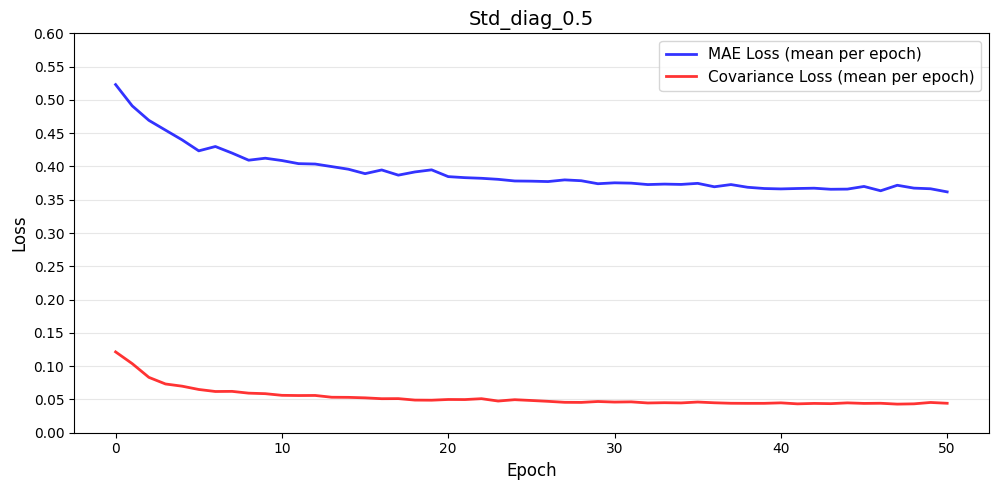

Total epochs: 51 (from epoch 0 to 50)
Total iterations: 9078


In [12]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from collections import defaultdict

# Read loss log file
log_file = "/home/tianze/Code/VideoMAE/checkpoints/final_experiments/K400-MRI-cov_loss_std_diag-pretrain/log.txt"

# Dictionary to store losses grouped by epoch
epoch_data = defaultdict(lambda: {'mae': [], 'cov': []})

# Parse the log file (JSON format) and group by epoch
with open(log_file, 'r') as f:
    for line in f:
        try:
            data = json.loads(line.strip())
            epoch = data['epoch']
            epoch_data[epoch]['mae'].append(data['train_mae_loss'])
            epoch_data[epoch]['cov'].append(data['train_cov_loss'])
        except (json.JSONDecodeError, KeyError):
            continue

# Aggregate losses by epoch (compute mean for each epoch)
epochs = sorted(epoch_data.keys())
mae_losses_per_epoch = [np.mean(epoch_data[e]['mae']) for e in epochs]
cov_losses_per_epoch = [np.mean(epoch_data[e]['cov']) for e in epochs]

# Create loss plot with epochs on x-axis
plt.figure(figsize=(10, 5))
plt.plot(epochs, mae_losses_per_epoch, 'b-', linewidth=2, label='MAE Loss (mean per epoch)', alpha=0.8)
plt.plot(epochs, cov_losses_per_epoch, 'r-', linewidth=2, label='Covariance Loss (mean per epoch)', alpha=0.8)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Std_diag_0.5', fontsize=14)
plt.grid(True, alpha=0.3, which='both', axis='y')
plt.legend(fontsize=11)
plt.tight_layout()

plt.gca().yaxis.set_major_locator(MultipleLocator(0.05))
plt.ylim(0, 0.6)

plt.show()



print(f"Total epochs: {len(epochs)} (from epoch {min(epochs)} to {max(epochs)})")
print(f"Total iterations: {sum(len(epoch_data[e]['mae']) for e in epochs)}")
